# Magic squares
---

## So it was Halloween

and I decided to do some [magic squares]() for an exam

I trolled (sic) around the internet and found some **dumb** code :

- https://www.codespeedy.com/magic-square-identification-in-python/
- https://www.w3resource.com/python-exercises/math/python-math-exercise-20.php

This is better but still **far** from optimal

- https://scipython.com/book/chapter-6-numpy/examples/creating-a-magic-square/

And this is a good idea but the execution **sucks**

https://medium.com/swlh/python-code-to-find-total-number-of-magic-squares-of-order-3-and-4-11be1376e5cd

---

my version below doesn't produce a **truly magic** square for every parameter value of

- ```seed```  (not true, I screwed up here)
- ```offset```
as the diagonals don't add up right every time but it's very cute.

```
seed = 8
seed_row = ( seed*np.arange(0,7) + 1) % 49
offset = 3 # must be != 0
```

and I think it get's them all up to the action of the permutation group.

In [356]:
#Function
# https://www.codespeedy.com/magic-square-identification-in-python/

import numpy as np

def generateSquare(n): 
    # 2-D array with all  
    # slots set to 0 
    magicSquare = np.zeros((n,n),dtype=np.int16)
    # initialize position of 1 
    i = n // 2
    j = n - 1
    # Fill the square by placing values 
    num = 1
    while num <= (n * n): 
        if i == -1 and j == n: # 3rd condition 
            j = n - 2
            i = 0
        else:  
            # next number goes out of 
            # right side of square  
            if j == n: 
                j = 0    
            # next number goes  
            # out of upper side 
            if i < 0: 
                i = n - 1
        if magicSquare[int(i),int(j)]: # 2nd condition 
            j = j - 2
            i = i + 1
            continue
        else: 
            magicSquare[int(i),int(j)] = num 
            num = num + 1
        j = j + 1
        i = i - 1 # 1st condition 

    return magicSquare

# Driver Code 
# Works only when n is odd 
n= 5
print(generateSquare(n) % 5)

[[4 3 2 1 0]
 [2 1 0 4 3]
 [0 4 3 2 1]
 [3 2 1 0 4]
 [1 0 4 3 2]]


In [751]:
#https://scipython.com/book/chapter-6-numpy/examples/creating-a-magic-square/

import numpy as np
N  = 7
magic_square = np.zeros((N,N), dtype=int)

n = 1
i, j = 0, N//2

while n <= N**2:
    magic_square[i, j] = n
    n += 1
    newi, newj = (i-1) % N, (j+1)% N
    if magic_square[newi, newj]:
        i += 1
    else:
        i, j = newi, newj

print(magic_square % 7)

[[2 4 6 1 3 5 0]
 [3 5 0 2 4 6 1]
 [4 6 1 3 5 0 2]
 [5 0 2 4 6 1 3]
 [6 1 3 5 0 2 4]
 [0 2 4 6 1 3 5]
 [1 3 5 0 2 4 6]]


In [46]:
magic_square 

array([[30, 39, 48,  1, 10, 19, 28],
       [38, 47,  7,  9, 18, 27, 29],
       [46,  6,  8, 17, 26, 35, 37],
       [ 5, 14, 16, 25, 34, 36, 45],
       [13, 15, 24, 33, 42, 44,  4],
       [21, 23, 32, 41, 43,  3, 12],
       [22, 31, 40, 49,  2, 11, 20]])

In [750]:
mm =  np.zeros((N,N), dtype=int)
v = mm[0].copy()
v[3:]  = np.arange(1,30,9)

for k in range(7):
    mm[k ] += v
    v[v>0] = (v[v>0] + 28) % 49
    v = np.roll(v, 3) 
    
mm

array([[ 0,  0,  0,  1, 10, 19, 28],
       [38, 47,  7,  0,  0,  0, 29],
       [ 0,  0,  8, 17, 26, 35,  0],
       [ 5, 14,  0,  0,  0, 36, 45],
       [ 0, 15, 24, 33, 42,  0,  0],
       [21,  0,  0,  0, 43,  3, 12],
       [22, 31, 40,  0,  0,  0,  0]])

In [757]:
N = 7
offset = 2
mm =  np.zeros((N,N), dtype=int)

v = mm[0].copy()
v[:3] = np.arange(30, N**2,9)
v[3:]  = np.arange(1,30,9)

for k in range(7):
    mm[k] = v
    v = (v + 28) % 49
    v = np.roll(v, offset) 

mm[-1, 6 * offset % 7 - 1] = 49


np.sum(mm,axis =0), np.sum(mm,axis = 1)

(array([175, 175, 175, 175, 175, 175, 175]),
 array([175, 175, 175, 175, 175, 175, 175]))

In [758]:
uu = mm.T.copy()
vv = uu.copy()

xx = sorted(vv.tolist() , key = lambda x: x[0] % 7)

In [759]:
MM = np.array(xx).T
yy = sorted(MM.tolist() , key = lambda x: x[0] % 7)
PP = np.array(yy)


array([[28,  1, 30, 10, 39, 19, 48],
       [43, 23,  3, 32, 12, 41, 21],
       [16, 45, 25,  5, 34, 14, 36],
       [38, 18, 47, 27,  7, 29,  9],
       [11, 40, 20, 49, 22,  2, 31],
       [33, 13, 42, 15, 44, 24,  4],
       [ 6, 35,  8, 37, 17, 46, 26]])

---

# So here is my version



In [865]:
N = 7
# I thought seed could take more values but :(
# and offset :( N= 7, offset = 6 
seed = N + 1
seed_row = (seed*np.arange(0, N) + 1) % N**2
seed_row = np.roll(seed_row, 3)
offset = 2

magic_square =  np.zeros((N,N), dtype=int)

for k in range(0,N):
    magic_square[k] = (np.roll(seed_row, k*offset) - k * N  ) % N**2
    
magic_square[magic_square == 0] = N**2

# check
np.sum(magic_square, 0), np.sum(magic_square, 1)
magic_square.trace()


[33 41  0  1  9 17 25]


175

In [829]:
uu = sorted(magic_square.tolist(), key = lambda x: x[0] % N)
np.array(uu) 

array([[49,  1,  9, 17, 25, 33, 41],
       [ 8, 16, 24, 32, 40, 48,  7],
       [23, 31, 39, 47,  6, 14, 15],
       [38, 46,  5, 13, 21, 22, 30],
       [ 4, 12, 20, 28, 29, 37, 45],
       [19, 27, 35, 36, 44,  3, 11],
       [34, 42, 43,  2, 10, 18, 26]])

In [843]:
N = 5
seed_row = ( (N+1)*np.arange(0, N) + 1) % N**2
seed_row = np.roll(seed_row, 1)

magic_square =  np.zeros((N,N), dtype=int)
for k in range(0,N):
    magic_square[k] = (np.roll(seed_row, -k) + k * N  ) % N**2
#exception
magic_square[magic_square == 0] = N**2

# check
np.sum(magic_square, axis=0), np.sum(magic_square, axis=1),  magic_square % N

(array([65, 65, 65, 65, 65]),
 array([65, 65, 65, 65, 65]),
 array([[0, 1, 2, 3, 4],
        [1, 2, 3, 4, 0],
        [2, 3, 4, 0, 1],
        [3, 4, 0, 1, 2],
        [4, 0, 1, 2, 3]]))

In [853]:
np.sum((25 - magic_square), 1)

array([60, 60, 60, 60, 60])

---
## and this is a Dehn twist

I suppose the point is that permutations are in $PGL(2,\mathbb{F}_p)$
and they generate it so the Dehn twist must too 

In [857]:
mm = magic_square
for k in range(N):
    mm = np.roll(mm, 5*k)
mm


array([[ 8, 16, 24, 32, 40, 48,  7],
       [49,  1,  9, 17, 25, 33, 41],
       [34, 42, 43,  2, 10, 18, 26],
       [19, 27, 35, 36, 44,  3, 11],
       [ 4, 12, 20, 28, 29, 37, 45],
       [38, 46,  5, 13, 21, 22, 30],
       [23, 31, 39, 47,  6, 14, 15]])

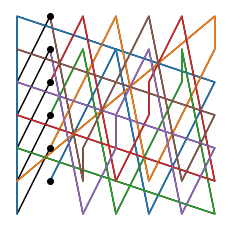

In [858]:
import matplotlib.pyplot as plt

cc = { x : (i // N, i % N)for i,x in enumerate(mm.ravel())}
uu = [cc[x] for x in range(1, N**2) ]
uu = np.array(uu)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set(frame_on=False)

ax.plot(uu.T[0],uu.T[1],'k')
for x in uu.reshape(-1,N+1,2):
    vv = x.T
    ax.plot(vv[0],vv[1]);
    ax.plot(vv[0,0],vv[1,0],'ko');



In [677]:
np.sum(mm, axis=0), np.sum(mm, axis=1)


(array([1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105,
        1105, 1105]),
 array([1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105, 1105,
        1105, 1105]))

In [752]:
! ../.g

[master 7548226] web
 4 files changed, 1184 insertions(+), 2 deletions(-)
 create mode 100644 PROG/.ipynb_checkpoints/magic_squares-checkpoint.ipynb
 create mode 100644 PROG/magic_squares.ipynb
Counting objects: 9, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (9/9), done.
Writing objects: 100% (9/9), 25.12 KiB | 12.56 MiB/s, done.
Total 9 (delta 6), reused 0 (delta 0)
remote: Resolving deltas: 100% (6/6), completed with 6 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   999ee76..7548226  master -> master


In [437]:
mm

array([[121,   1,  13,  25,  37,  49,  61,  73,  85,  97, 109],
       [ 84,  96, 108, 120,  11,  12,  24,  36,  48,  60,  72],
       [ 47,  59,  71,  83,  95, 107, 119,  10,  22,  23,  35],
       [ 21,  33,  34,  46,  58,  70,  82,  94, 106, 118,   9],
       [105, 117,   8,  20,  32,  44,  45,  57,  69,  81,  93],
       [ 68,  80,  92, 104, 116,   7,  19,  31,  43,  55,  56],
       [ 42,  54,  66,  67,  79,  91, 103, 115,   6,  18,  30],
       [  5,  17,  29,  41,  53,  65,  77,  78,  90, 102, 114],
       [ 89, 101, 113,   4,  16,  28,  40,  52,  64,  76,  88],
       [ 63,  75,  87,  99, 100, 112,   3,  15,  27,  39,  51],
       [ 26,  38,  50,  62,  74,  86,  98, 110, 111,   2,  14]])

---

# won't work there are repeat digits

In [536]:
dob = [1,8, 68]
mm = magic_square.copy()
tt = [ np.where(magic_square == _) for _ in dob ]

for k in range(2):
    #if k > 0 : break
    uu = dob.pop(0)
    x,y = np.where(mm == uu)
    x,y = x[0], y[0]
    print(uu, mm[x,y])
    a,b  = mm[0].copy(), mm[x].copy()
    mm[0], mm[x] = b,a
    # fck me stupid 
    a, b  = mm[:,k].copy(), mm[:,y].copy()
    mm[:,k], mm[:,y] = b,a
    

np.where(mm == 8)
mm

1 1
8 8


array([[117,   8, 105,  20,  32,  44,  45,  57,  69,  81,  93],
       [ 96, 108,  84, 120,  11,  12,  24,  36,  48,  60,  72],
       [ 59,  71,  47,  83,  95, 107, 119,  10,  22,  23,  35],
       [ 33,  34,  21,  46,  58,  70,  82,  94, 106, 118,   9],
       [  1,  13, 121,  25,  37,  49,  61,  73,  85,  97, 109],
       [ 80,  92,  68, 104, 116,   7,  19,  31,  43,  55,  56],
       [ 54,  66,  42,  67,  79,  91, 103, 115,   6,  18,  30],
       [ 17,  29,   5,  41,  53,  65,  77,  78,  90, 102, 114],
       [101, 113,  89,   4,  16,  28,  40,  52,  64,  76,  88],
       [ 75,  87,  63,  99, 100, 112,   3,  15,  27,  39,  51],
       [ 38,  50,  26,  62,  74,  86,  98, 110, 111,   2,  14]])

In [532]:
dob = [1,8, 68]
for x in dob:
    print(np.where(mm == x))

(array([4]), array([0]))
(array([5]), array([1]))
(array([0]), array([2]))


In [525]:
mm[0,:]

array([  1,  13, 121,  25,  37,  49,  61,  73,  85,  97, 109])

In [461]:
magic_square

array([[121,   1,  13,  25,  37,  49,  61,  73,  85,  97, 109],
       [ 84,  96, 108, 120,  11,  12,  24,  36,  48,  60,  72],
       [ 47,  59,  71,  83,  95, 107, 119,  10,  22,  23,  35],
       [ 21,  33,  34,  46,  58,  70,  82,  94, 106, 118,   9],
       [105, 117,   8,  20,  32,  44,  45,  57,  69,  81,  93],
       [ 68,  80,  92, 104, 116,   7,  19,  31,  43,  55,  56],
       [ 42,  54,  66,  67,  79,  91, 103, 115,   6,  18,  30],
       [  5,  17,  29,  41,  53,  65,  77,  78,  90, 102, 114],
       [ 89, 101, 113,   4,  16,  28,  40,  52,  64,  76,  88],
       [ 63,  75,  87,  99, 100, 112,   3,  15,  27,  39,  51],
       [ 26,  38,  50,  62,  74,  86,  98, 110, 111,   2,  14]])